In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q datasets transformers[sentencepiece] simpletransformers

     |████████████████████████████████| 311 kB 14.1 MB/s 
     |████████████████████████████████| 3.5 MB 61.9 MB/s 
     |████████████████████████████████| 248 kB 69.2 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 243 kB 72.8 MB/s 
     |████████████████████████████████| 133 kB 73.1 MB/s 
     |████████████████████████████████| 1.1 MB 57.6 MB/s 
     |████████████████████████████████| 9.7 MB 55.5 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 1.7 MB 53.7 MB/s 
     |████████████████████████████████| 6.8 MB 51.7 MB/s 
     |████████████████████████████████| 1.2 MB 62.3 MB/s 
     |████████████████████████████████| 895 kB 16.9 MB/s 
     |████████████████████████████████| 596 kB 60.1 MB/s 
     |████████████████████████████████| 180 kB 70.4 MB/s 
     |████████████████████████████████| 144 kB 74.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |██████████████

In [ ]:
! pip install -q simpletransformers

In [ ]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

In [ ]:
!tar -xzvf "/content/AIFORTHAI-LST20Corpus.tar.gz" -C "/content/"

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T12371.txt
LST20_Corpus/train/T12371.txt
LST20_Corpus/train/._T11678.txt
LST20_Corpus/train/T11678.txt
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/

In [ ]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")

Downloading:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Using custom data configuration default-97621787f5b60e1b


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset lst20 downloaded and prepared to /root/.cache/huggingface/datasets/lst20/default-97621787f5b60e1b/0.0.0/e1b2a921fb011578ab43ddbbf789f3c500d62cb2df8ae4ed4b60bae8e4c0d3ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
lst20

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [ ]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
train_df

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
...,...,...,...,...,...,...
63305,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63306,7,T13136.txt,"[เมื่อ, ถาม, ว่า, _, ใน, ทาง, การเมือง, _, หาก...","[4, 1, 3, 2, 4, 0, 0, 2, 3, 0, 3, 1, 0, 6, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63307,8,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, เรื่อง, กฎหมาย...","[0, 0, 2, 1, 3, 2, 0, 0, 5, 3, 1, 2, 7, 1, 1, ...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63308,9,T13136.txt,"[หาก, เป็น, การ, ขอ, ถวาย, ฎีกา, ตาม, โบราณ, ร...","[3, 1, 7, 1, 1, 0, 4, 0, 0, 2, 5, 1, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, ..."


In [ ]:
# See tags from https://github.com/huggingface/datasets/blob/master/datasets/lst20/lst20.py
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

In [ ]:
def convert_to_simple_transformer_format(df, field_name, tags):
  sentence_id = []
  words = []
  labels = []

  #Limit at 1000 rows for speed.
  for (idx, r) in df[:].iterrows():
    # print(idx)
    for (i, t) in enumerate(r['tokens']):
      # print(i,t)
      sentence_id.append(idx)
      words.append(t)
      labels.append(tags[r[field_name][i]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )


In [ ]:
train_ = convert_to_simple_transformer_format(train_df, "pos_tags", _POS_TAGS)

In [ ]:
train_

,sentence_id,words,labels
0,0,สุรยุทธ์,NN
1,0,ยัน,VV
2,0,ปฏิเสธ,VV
3,0,ลงนาม,VV
4,0,_,PU
...,...,...,...
2714721,63309,การ,FX
2714722,63309,ถอน,VV
2714723,63309,รายชื่อ,NN
2714724,63309,ด้วย,PS


In [ ]:
validation_ = convert_to_simple_transformer_format(validation_df, "pos_tags", _POS_TAGS)
test_ = convert_to_simple_transformer_format(test_df, "pos_tags", _POS_TAGS)

In [ ]:
# Configure the model
model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 10

model = NERModel(
    "roberta", "KoichiYasuoka/roberta-base-thai-syllable", args=model_args, use_cuda=torch.cuda.is_available(), labels=_POS_TAGS
)

# Train the model
model.train_model(train_, eval_data=validation_)

Downloading:   0%|          | 0.00/757 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/377M [00:00<?, ?B/s]

Some weights of the model checkpoint at KoichiYasuoka/roberta-base-thai-syllable were not used when initializing RobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at KoichiYasuoka/roberta-base-thai-syllable and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on

Downloading:   0%|          | 0.00/298 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/325k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/109 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'RobertaTokenizerFast'.


  0%|          | 0/2 [00:01<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AX seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: AV seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PU seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: N

Running Epoch 1 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/1979 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/703 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(["ประยุธต์","","กิน","ข้าว"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'ประยุธต์': 'NN'}], [], [{'กิน': 'VV'}], [{'ข้าว': 'NN'}]]

In [ ]:
test = []
with open('/content/pos_test.txt', encoding='utf8') as f:
    for line in f:
        #print(line.strip())
        test.append(line)

In [ ]:
testRl = []
for i in test:
  testRl.append(i.strip())

In [ ]:
testRl[0:5]


['อย่างไรก็ตาม', 'เครื่อง', 'บิน', 'แอร์บัส', '']

In [ ]:
predictions, raw_outputs = model.predict(testRl)
predictions

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/12990 [00:00<?, ?it/s]

[[{'อย่างไรก็ตาม': 'CC'}],
 [{'เครื่อง': 'NN'}],
 [{'บิน': 'VV'}],
 [{'แอร์บัส': 'NN'}],
 [],
 [{'เอ': 'NN'}],
 [{'380': 'NU'}],
 [{'ได้': 'AX'}],
 [{'ถึง': 'PS'}],
 [{'ที่': 'CC'}],
 [{'หมาย': 'NN'}],
 [{'ที่': 'CC'}],
 [{'ท่าอากาศยาน': 'NN'}],
 [{'เชียงใหม่': 'NN'}],
 [{'ใน': 'PS'}],
 [{'เวลา': 'NN'}],
 [],
 [{'14.50': 'NU'}],
 [],
 [{'น.': 'NN'}],
 [{'โดย': 'CC'}],
 [{'ใช้': 'VV'}],
 [{'เวลา': 'NN'}],
 [{'บิน': 'VV'}],
 [{'ประมาณ': 'AJ'}],
 [{'1': 'NU'}],
 [{'ชั่วโมง': 'NN'}],
 [],
 [{'มูลนิธิสืบฯ': 'NN'}],
 [{'พอใจ': 'VV'}],
 [{'ฟื้น': 'VV'}],
 [{'ป่าห้วยขาแข้ง': 'NN'}],
 [{'มี': 'VV'}],
 [{'เสือโคร่ง': 'NN'}],
 [{'มาก': 'VV'}],
 [{'อันดับ': 'NN'}],
 [{'2': 'NU'}],
 [{'โลก': 'NN'}],
 [],
 [{'1': 'NU'}],
 [],
 [{'กันยายน': 'NN'}],
 [],
 [{'2550': 'NU'}],
 [{'17.31': 'NU'}],
 [{'น.': 'NN'}],
 [],
 [{'ประธาน': 'NN'}],
 [{'มูลนิธิ': 'NN'}],
 [{'สืบ': 'VV'}],
 [{'นาคะเสถียร': 'NN'}],
 [{'พอใจ': 'VV'}],
 [{'ป่า': 'NN'}],
 [{'ห้วยขาแข้ง': 'NN'}],
 [{'ฟื้นตัว': 'VV'}],
 [{'พบ': 'VV'}],
 [{

In [ ]:
predictions[0]

[{'อย่างไรก็ตาม': 'CC'}]

In [ ]:
f = open("/content/pos_test.txt", "r")
test_data = f.read()

In [ ]:
test_data = test_data.replace("\n", " ")
test_df = test_data.split(" ")

In [ ]:
for i in range(len(test_df)):
  if test_df[i] == "":
    test_df[i] = " "

In [ ]:
df = pd.DataFrame(data=test_df, columns=["word"])

In [ ]:
df

,word
0,อย่างไรก็ตาม
1,เครื่อง
2,บิน
3,แอร์บัส
4,
...,...
103909,พร้อม
103910,รับ
103911,การ
103912,โจมตี


In [ ]:
def convert_to_key_valuefrom(dic):
  if (dic == None):
    return "O"
  else:
    dic = list(dic.items())[0]
    return dic[0] + "_" + dic[1]

In [ ]:
a = pd.DataFrame(predictions)
a.drop(columns=[1], axis=1, inplace=True)
a

,0
0,{'อย่างไรก็ตาม': 'CC'}
1,{'เครื่อง': 'NN'}
2,{'บิน': 'VV'}
3,{'แอร์บัส': 'NN'}
4,None
...,...
103908,{'เตรียม': 'VV'}
103909,{'พร้อม': 'VV'}
103910,{'รับ': 'VV'}
103911,{'การ': 'FX'}


In [ ]:
a.rename({0:'word'}, axis=1, inplace=True)
a['word'] = a['word'].apply(convert_to_key_valuefrom)

In [ ]:
a['Id'] = a['word'].apply(lambda x:x.split("_")[0])

In [ ]:
a['Predicted'] = a['word'].apply(lambda x:x.split("_")[-1])
a.drop(columns=['word', 'Id'], axis=1, inplace=True)

In [ ]:
a.reset_index(inplace=True)
a['index'] = a['index']+1
a.set_index("index", inplace=True)
a

,Predicted
index,
1,CC
2,NN
3,VV
4,NN
5,O
...,...
103909,VV
103910,VV
103911,VV


In [ ]:
a.to_csv('sun16epoch.csv')

In [ ]:
a['Predicted'].value_counts()

NN    29216
VV    25808
O     16794
CC     9027
AX     4099
PS     4082
FX     3921
NU     3222
PU     1793
AJ     1720
AV     1640
NG      985
CL      792
PR      784
PA       27
IJ        2
XX        1
Name: Predicted, dtype: int64

[ 'AJ', 'AV', 'AX', 'CC', 'CL', 'FX', 'IJ', 'NG', 'NN', 'NU', 'O', 'PA', 'PR', 'PS', 'PU', 'VV', 'XX']

In [ ]:
%cp -av "/content/outputs" "/content/drive/MyDrive/output_roberta_5epoch/"

'/content/outputs' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs'
'/content/outputs/checkpoint-1979-epoch-1' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1'
'/content/outputs/checkpoint-1979-epoch-1/config.json' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1/config.json'
'/content/outputs/checkpoint-1979-epoch-1/pytorch_model.bin' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1/pytorch_model.bin'
'/content/outputs/checkpoint-1979-epoch-1/tokenizer_config.json' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1/tokenizer_config.json'
'/content/outputs/checkpoint-1979-epoch-1/special_tokens_map.json' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1/special_tokens_map.json'
'/content/outputs/checkpoint-1979-epoch-1/vocab.txt' -> '/content/drive/MyDrive/output_roberta_5epoch/outputs/checkpoint-1979-epoch-1/vocab.txt'
'

In [ ]:
 #a = train_.loc[train_['labels'] == 'XX']

In [ ]:
#a

,sentence_id,words,labels
58047,1906,a,XX
63886,2124,เดอะ,XX
72147,2438,-,XX
74037,2525,ของ,XX
117784,3978,น้ำตาตกใน,XX
...,...,...,...
2578406,59938,กลุย,XX
2578436,59940,ดันดรีม,XX
2680502,62500,แต่อย่าง,XX
2681808,62531,แต่อย่าง,XX


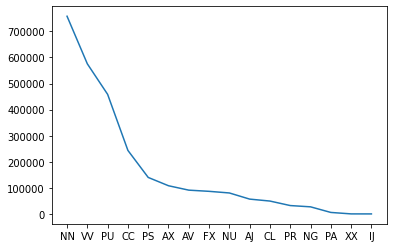

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(train_['labels'].value_counts())